# 图13 带标记的发散型棒棒糖图

带标记的棒棒糖图通过强调想要强调的任何重要数据点并在图表中适当地给出推理，提供了一种对差异进行可视化的灵活方式.

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


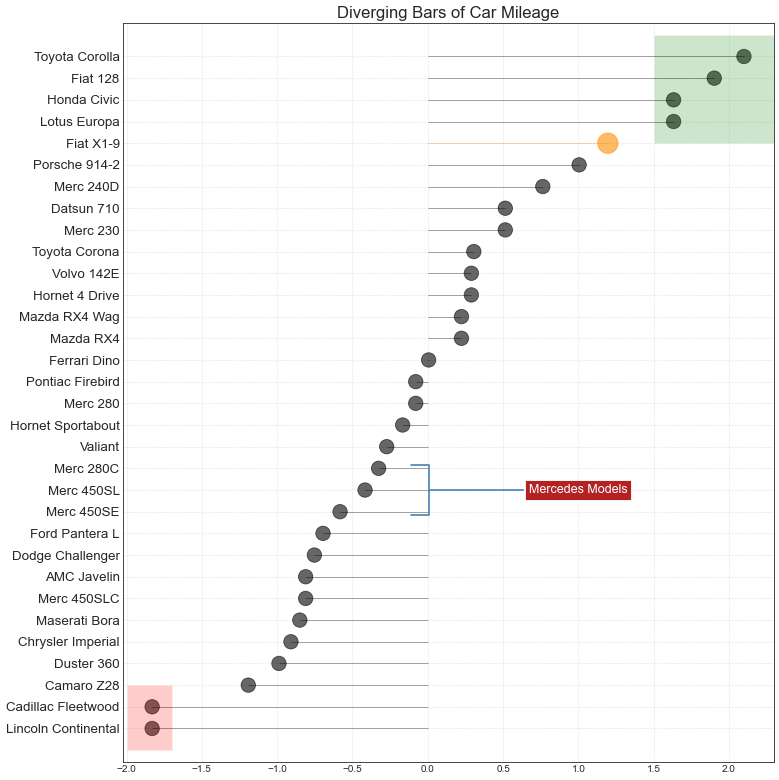

In [1]:
from doc.Plot.require import *
import matplotlib.patches as patches

# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
# df = pd.read_csv("../data/mtcars.csv")

x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14, 16), dpi=60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data',
             fontsize=15, ha='center', va='center', bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)

plt.show()